In [1]:
import os
import glob
import torch
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
from torchvision.transforms import transforms
from torch.utils.data import DataLoader, Dataset
from torch.optim import Adam
from torch.autograd import Variable
import torchvision 
import pathlib
from pathlib import Path
import torch.nn.functional as F

C:\Users\test\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


$\Large\text{Data load}$

In [2]:
path_folder = 'TOP4040/'

In [3]:
folder = Path(path_folder)

In [4]:
data = np.load(path_folder + '3.npz')['arr_0']

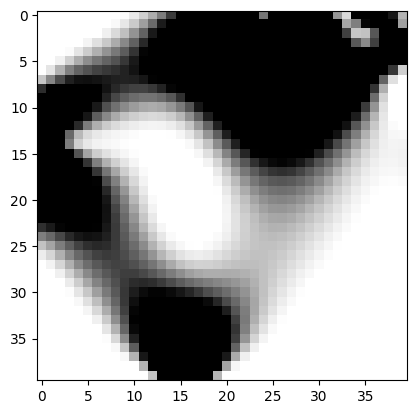

In [5]:
plt.imshow(data[0], cmap='Greys')

In [6]:
class NPZLoader(Dataset):
    def __init__(self, path, transform=None, cur_iter = 7):
        self.path = path
        self.files = list(Path(path).glob('**/*.npz'))
        self.transform = transform
        self.cur_iter = cur_iter

    def __len__(self):
        return len(self.files)

    def __getitem__(self, item):
        numpy_array = np.load(self.files[item])['arr_0']
        target = numpy_array[-1]
        r,c = numpy_array[0].shape
        n_1_iter = numpy_array[self.cur_iter]
        n_iter = numpy_array[self.cur_iter-1]
        gradient = (n_1_iter - n_iter).reshape(1,r,c)
        sample = np.concatenate((n_1_iter.reshape(1,r,c),gradient)), target
        
        
#         torch_array = torch.from_numpy(numpy_array)
        if self.transform:
            sample = self.transform(sample)
        return sample

In [7]:
check = NPZLoader(path_folder,cur_iter = 5)

In [8]:
check[0][0].shape

(2, 40, 40)

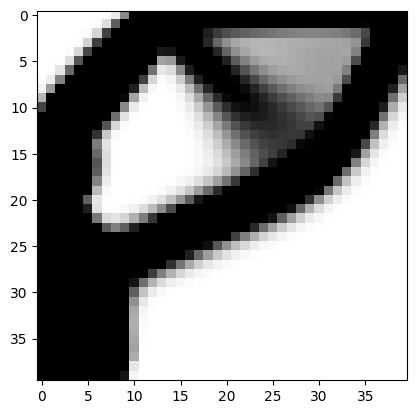

In [9]:
plt.imshow(check[3][0][0], cmap= 'binary')

$\Large\text{Examples of tensor usage}$

In [7]:
x = torch.rand(6,6)
x

tensor([[0.2552, 0.3093, 0.7562, 0.3721, 0.5608, 0.9631],
        [0.3879, 0.7418, 0.6369, 0.3001, 0.8003, 0.1239],
        [0.0463, 0.9050, 0.1236, 0.6749, 0.7779, 0.2445],
        [0.7138, 0.0770, 0.2541, 0.7262, 0.7306, 0.2684],
        [0.4473, 0.9887, 0.4367, 0.4497, 0.5449, 0.8504],
        [0.4483, 0.0965, 0.9171, 0.6618, 0.2546, 0.7338]])

In [8]:
x.view(36)

tensor([0.2552, 0.3093, 0.7562, 0.3721, 0.5608, 0.9631, 0.3879, 0.7418, 0.6369,
        0.3001, 0.8003, 0.1239, 0.0463, 0.9050, 0.1236, 0.6749, 0.7779, 0.2445,
        0.7138, 0.0770, 0.2541, 0.7262, 0.7306, 0.2684, 0.4473, 0.9887, 0.4367,
        0.4497, 0.5449, 0.8504, 0.4483, 0.0965, 0.9171, 0.6618, 0.2546, 0.7338])

In [9]:
x.view(3,12)

tensor([[0.2552, 0.3093, 0.7562, 0.3721, 0.5608, 0.9631, 0.3879, 0.7418, 0.6369,
         0.3001, 0.8003, 0.1239],
        [0.0463, 0.9050, 0.1236, 0.6749, 0.7779, 0.2445, 0.7138, 0.0770, 0.2541,
         0.7262, 0.7306, 0.2684],
        [0.4473, 0.9887, 0.4367, 0.4497, 0.5449, 0.8504, 0.4483, 0.0965, 0.9171,
         0.6618, 0.2546, 0.7338]])

In [10]:
x.view(-1, 12) # -1 , python automatically calculate the size

tensor([[0.2552, 0.3093, 0.7562, 0.3721, 0.5608, 0.9631, 0.3879, 0.7418, 0.6369,
         0.3001, 0.8003, 0.1239],
        [0.0463, 0.9050, 0.1236, 0.6749, 0.7779, 0.2445, 0.7138, 0.0770, 0.2541,
         0.7262, 0.7306, 0.2684],
        [0.4473, 0.9887, 0.4367, 0.4497, 0.5449, 0.8504, 0.4483, 0.0965, 0.9171,
         0.6618, 0.2546, 0.7338]])

In [11]:
a = torch.ones(5)
a

tensor([1., 1., 1., 1., 1.])

In [12]:
b = a.numpy() #have to write copy(), otherwise they are stored at the same memory
b

array([1., 1., 1., 1., 1.], dtype=float32)

In [13]:
c = a.numpy().copy() #have to write copy(), otherwise they are stored at the same memory and whenever you change the value in a it is also changed in b
c

array([1., 1., 1., 1., 1.], dtype=float32)

In [14]:
a.add_(5)
a

tensor([6., 6., 6., 6., 6.])

In [15]:
b

array([6., 6., 6., 6., 6.], dtype=float32)

In [16]:
c

array([1., 1., 1., 1., 1.], dtype=float32)

In [17]:
x = torch.ones(5, requires_grad = True)
x # it says to tensor that later it requires to calculate the gradients for this tensor in optimization steps

tensor([1., 1., 1., 1., 1.], requires_grad=True)

In [18]:
type(x[0].item())

float

$\Large\text{Gradient calculation with autograd}$

In [19]:
x = torch.randn(3, requires_grad = True)
x

tensor([ 1.3347, -0.7786,  0.9148], requires_grad=True)

In [20]:
y = x + 2
y

tensor([3.3347, 1.2214, 2.9148], grad_fn=<AddBackward0>)

In [21]:
z = y**2*2
# z = z.mean()

In [22]:
# z.backward() #dz/dx
# print(x.grad)

In [23]:
# What if we dont specify z = z.mean()
v = torch.tensor([0.1, 1.0, 0.001], dtype = torch.float32)
z.backward(v) # in the backward it is vector jacobian product
print(x.grad) 

tensor([1.3339, 4.8856, 0.0117])


In [24]:
# x.requires_grad_(False)
# x.detach()
# with torch.no_grad():

In [25]:
x.requires_grad_(False) # Whenever our function has _ at the end it means that is modified our variable inplace
x # Now x does not have requires_grad=True
# The same will be with y = x.detach()
# with torch.no_grad():
#    y = x + 2 

tensor([ 1.3347, -0.7786,  0.9148])

$\text{Whenever we call backward function then the gradient for this tensor will be accumulated into the dot grad attribute, the values will be summed up}$ 

In [26]:
weights = torch.ones(4 , requires_grad=True)

$\text{Before we do the next iteration or optimiztion we must empty the gradients}$

In [27]:
for epoch in range(4):
    model_output = (weights*3).sum()
    
    model_output.backward()
    
    print(weights.grad)
    
    weights.grad.zero_() # Empty 

tensor([3., 3., 3., 3.])
tensor([3., 3., 3., 3.])
tensor([3., 3., 3., 3.])
tensor([3., 3., 3., 3.])


In [28]:
#With optimization

# optimizer = torch.optim.SGD(weights, lr=0.01)
# optimizer.step()
# optimizer.zero_grad()

$\Large\text{Backpropagation}$

In [29]:
x = torch.tensor(1.0)
y = torch.tensor(2.0)

w = torch.tensor(1.0,requires_grad = True)


In [30]:
#forward pass and compute the loss

In [31]:
y_hat = w*x
loss = (y_hat- y) **2
loss

tensor(1., grad_fn=<PowBackward0>)

In [32]:
# Backward pass
loss.backward()
w.grad

tensor(-2.)

$\text{Next we have to update our weights and next forward and backkward}$

$\Large\text{Gradient Descent with Autograd and Backpropagation}$

$\text{Manually}$

In [323]:
X = np.array(list(range(1,5)), dtype = np.float32)
Y = X.copy()*2
w = 0.0
X

array([1., 2., 3., 4.], dtype=float32)

In [324]:
def forward(x):
    
    return w * x

In [325]:
def loss(y, y_pred):
    
    return ((y - y_pred)**2).mean()

In [326]:
#MSE = 1/N * (w*x - y)**2
#dJ/dw = 1/N 2x (w*x - y)

def gradient(x,y, y_pred):
    
    return np.dot(2*x, y_pred - y).mean()

In [327]:
gradient(np.array([1,2,3]), np.array([2,4,8]), np.array([2,4,10]))

12.0

In [328]:
loss(np.array([2,4,8]), np.array([2,4,10]))

1.3333333333333333

In [329]:
print(f'Prediction before training: f(5) = {forward(5):.3f}')

Prediction before training: f(5) = 0.000


In [330]:
learning_rate = 0.01
n_iters = 10

In [331]:
X = np.array(list(range(1,5)), dtype = np.float32)
Y = X.copy()*2
w = 0.0

for epoch in range(n_iters):
    
    # prediction = forward pass 
    y_pred = forward(X)
    print(y_pred)
    #loss 
    l = loss(Y,y_pred)
    
    #gradients
    
    dw = gradient(X,Y, y_pred)
    
    #update weights
    
    w = w - learning_rate*dw
    
    if epoch%1 == 0:
        print(f'epoch {epoch + 1}: w = {w:.3f}, loss = {l:.8f}, dw = {dw}')
        


[0. 0. 0. 0.]
epoch 1: w = 1.200, loss = 30.00000000, dw = -120.0
[1.2       2.4       3.6000001 4.8      ]
epoch 2: w = 1.680, loss = 4.79999924, dw = -47.999996185302734
[1.68 3.36 5.04 6.72]
epoch 3: w = 1.872, loss = 0.76800019, dw = -19.200002670288086
[1.872 3.744 5.616 7.488]
epoch 4: w = 1.949, loss = 0.12288000, dw = -7.679999828338623
[1.9488 3.8976 5.8464 7.7952]
epoch 5: w = 1.980, loss = 0.01966083, dw = -3.072002649307251
[1.97952 3.95904 5.93856 7.91808]
epoch 6: w = 1.992, loss = 0.00314574, dw = -1.2288014888763428
[1.991808  3.983616  5.9754243 7.967232 ]
epoch 7: w = 1.997, loss = 0.00050331, dw = -0.4915158748626709
[1.9967232 3.9934464 5.9901695 7.9868927]
epoch 8: w = 1.999, loss = 0.00008053, dw = -0.1966094970703125
[1.9986893 3.9973786 5.996068  7.994757 ]
epoch 9: w = 1.999, loss = 0.00001288, dw = -0.07864165306091309
[1.9994757 3.9989514 5.9984274 7.997903 ]
epoch 10: w = 2.000, loss = 0.00000206, dw = -0.03145551681518555


In [41]:
print(f'Prediction after training: f(5) = {forward(5):.3f}')

Prediction after training: f(5) = 9.999


$\text{Gradients computation with Autograd}$

In [42]:
X = torch.tensor(list(range(1,5)), dtype = torch.float32)
Y = X*2
w = torch.tensor(0.0, dtype = torch.float32, requires_grad = True)
n_iters = 20
for epoch in range(n_iters):
    
    # prediction = forward pass 
    y_pred = forward(X)
    #loss 
    l = loss(Y,y_pred)
    
    #gradients
    
    l.backward() # dl/dw
    
    #update weights
    with torch.no_grad(): 
        w-= w.grad*learning_rate
    # zero gradients
    w.grad.zero_()
    if epoch%2 == 0:
        print(f'epoch {epoch + 1}: w = {w:.3f}, loss = {l:.8f}, dw = {dw}')
        
print(f'Prediction before training: f(5) = {forward(5):.3f}')

epoch 1: w = 0.300, loss = 30.00000000, dw = -0.03145551681518555
epoch 3: w = 0.772, loss = 15.66018772, dw = -0.03145551681518555
epoch 5: w = 1.113, loss = 8.17471695, dw = -0.03145551681518555
epoch 7: w = 1.359, loss = 4.26725292, dw = -0.03145551681518555
epoch 9: w = 1.537, loss = 2.22753215, dw = -0.03145551681518555
epoch 11: w = 1.665, loss = 1.16278565, dw = -0.03145551681518555
epoch 13: w = 1.758, loss = 0.60698116, dw = -0.03145551681518555
epoch 15: w = 1.825, loss = 0.31684780, dw = -0.03145551681518555
epoch 17: w = 1.874, loss = 0.16539653, dw = -0.03145551681518555
epoch 19: w = 1.909, loss = 0.08633806, dw = -0.03145551681518555
Prediction before training: f(5) = 9.612


$\text{Examples from the videos}$

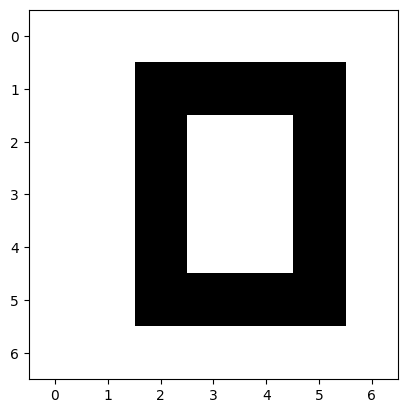

In [43]:
zero = np.zeros((7,7), dtype = np.int32)

zero[1:-1, 2::3] = 1
zero[1:-1:4, 2:-1] = 1


plt.imshow(zero , cmap = 'Greys')

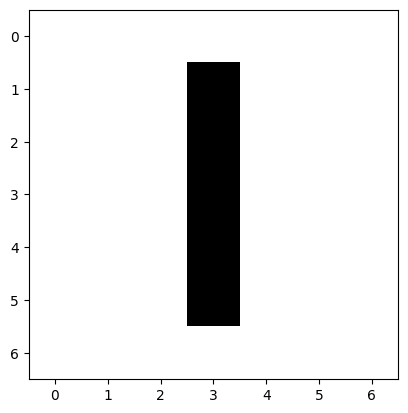

In [44]:
one = np.zeros((7,7), dtype = np.int32)
one[1:-1,3] = 1
plt.imshow(one , cmap = 'Greys')

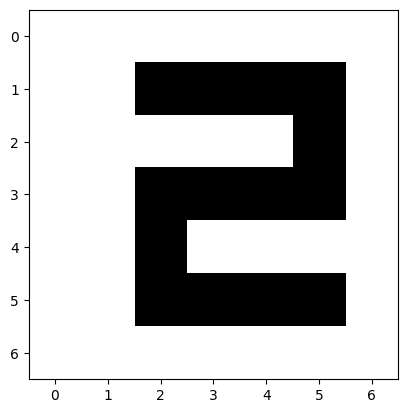

In [45]:
two = np.zeros((7,7), dtype = np.int32)

two[1:-1, 2] = 1
two[1:-1:2, 2:-1] = 1
two[2, 2] = 0
two[2, -2] = 1



plt.imshow(two , cmap = 'Greys')

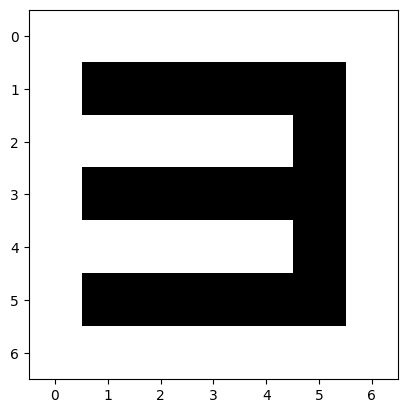

In [46]:
three = np.zeros((7,7), dtype = np.int32)

three[1:-1, -2] = 1
three[1:-1:2, 1:-2] = 1

plt.imshow(three , cmap = 'Greys')

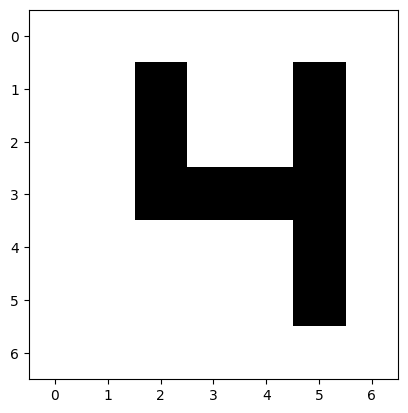

In [47]:
four = np.zeros((7,7), dtype = np.int32)

four[1:4, 2:-1:3] = 1
four[3, 2:-1] = 1
four[3 :-1, -2] = 1
# four[1:-1:2, 1:-2] = 1

plt.imshow(four , cmap = 'Greys')

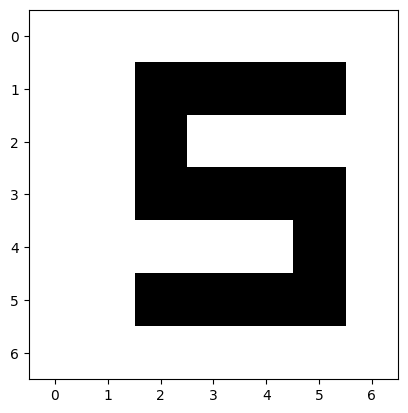

In [48]:
five = np.zeros((7,7), dtype = np.int32)

five[1:-1, 2] = 1
five[1:-1:2, 2:-1] = 1
five[-3, -2] = 1
five[-3, 2] = 0


plt.imshow(five , cmap = 'Greys')

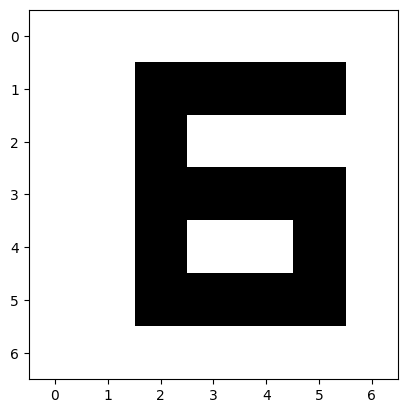

In [49]:
six = np.zeros((7,7), dtype = np.int32)

six[1:-1, 2] = 1
six[1:-1:2, 2:-1] = 1
six[-3, -2] = 1

# four[1:-1:2, 1:-2] = 1

plt.imshow(six , cmap = 'Greys')

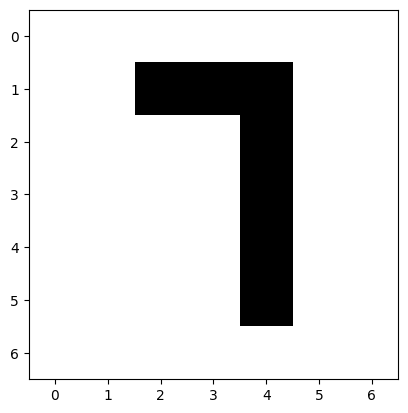

In [50]:
sev = np.zeros((7,7), dtype = np.int32)

sev[1:-1, -3] = 1
sev[1, 2:-3] = 1

# four[1:-1:2, 1:-2] = 1

plt.imshow(sev , cmap = 'Greys')

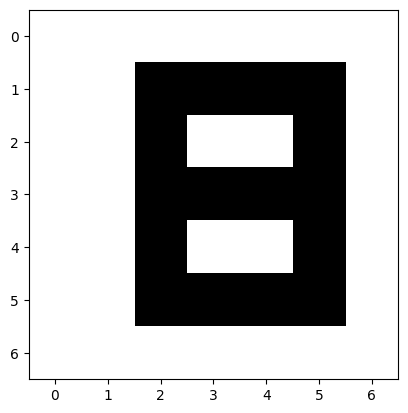

In [51]:
eig = np.zeros((7,7), dtype = np.int32)

eig[1:-1, 2::3] = 1
eig[1:-1:2, 2:-1] = 1


plt.imshow(eig , cmap = 'Greys')

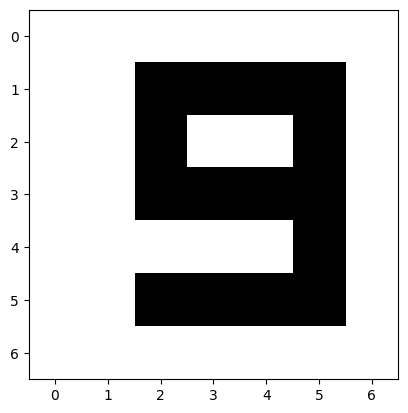

In [52]:
nine = np.zeros((7,7), dtype = np.int32)

nine[1:-1, 2] = 1
nine[1:-1:2, 2:-1] = 1
nine[-3, -2] = 1
nine[-3, 2] = 0
nine[2, -2] = 1

plt.imshow(nine , cmap = 'Greys')

In [53]:
import random

In [54]:
def relu(t):
    return np.maximum(t,0)

def softmax(t):
    
    out = np.exp(t)
    return out/np.sum(out)

def sparse_cross_entropy(z,y):
    return -np.log(z[0,y])


def relu_deriv(t):
    
    return (t >= 0).astype(float)

def predict(x):
    if x.shape[0] != 1:
        x = x.reshape(1,-1)
    t1 = np.dot(x, W1) + b1
    h1 = relu(t1)
    t2 = h1 @ W2 + b2
    z = softmax(t2)
    return z

def cals_accuracy(cur_set):
    correct = 0
    
    for x,y in cur_set:
        z = predict(x)
        y_pred = np.argmax(z)
        if y_pred == y:
            correct += 1
    acc = correct / len(cur_set)
    return acc

def to_full(y, num_classes):
    y_full = np.zeros((1,num_classes))
    
    y_full[0,y] = 1
    
    return y_full

In [55]:
from sklearn import datasets

In [56]:
iris = datasets.load_iris()

In [57]:
print(iris.get('target').shape)
print(iris.data[0].shape)
print(iris.data[0][None, ...].shape) # [None, ...] from (4,) to (1, 4 ) 

(150,)
(4,)
(1, 4)


In [58]:
dataset = [(iris.data[i].reshape(1,-1), iris.target[i]) for i in range(len(iris.target))]
dataset[:5]

[(array([[5.1, 3.5, 1.4, 0.2]]), 0),
 (array([[4.9, 3. , 1.4, 0.2]]), 0),
 (array([[4.7, 3.2, 1.3, 0.2]]), 0),
 (array([[4.6, 3.1, 1.5, 0.2]]), 0),
 (array([[5. , 3.6, 1.4, 0.2]]), 0)]

In [59]:
input_dim = 4
out_dim = 3
h_dim = 5
epoch = 100
batch_size = 50 # Hyperparameter

W1 = np.random.randn(input_dim, h_dim)
b1 = np.random.randn(1, h_dim)
W2 = np.random.rand(h_dim, out_dim)
b2 = np.random.randn(1, out_dim)

# new initial values

W1 = (W1 - 0.5)*2 * np.sqrt(1/input_dim)
b1 = (b1 - 0.5)*2 * np.sqrt(1/input_dim)
W2 = (W2 - 0.5)*2 * np.sqrt(1/h_dim)
b2 = (b2 - 0.5)*2 * np.sqrt(1/h_dim)

In [60]:
loss_arr = []
acc = []
for ep in range(epoch):
    
    random.shuffle(dataset)
    for i in range(len(dataset)):

        x,y = dataset[i]
        #Forward 

        t1 = np.dot(x, W1) + b1
        h1 = relu(t1)
        t2 = h1 @ W2 + b2
        z = softmax(t2)

        E = sparse_cross_entropy(z,y)

        #Backward

        y_full = to_full(y, out_dim)
        dE_dt2 = z - y_full 
        dE_dW2 = h1.T @ dE_dt2
        dE_db2 = dE_dt2
        dE_dh1 = dE_dt2 @W2.T
        dE_dt1 = dE_dh1 * relu_deriv(t1)
        dE_dW1 = x.T @ dE_dt1
        dE_db1 = dE_dt1

        alpha = 0.001

        # update 

        W1 = W1 - alpha * dE_dW1
        b1 = b1 - alpha * dE_db1
        W2 = W2 - alpha * dE_dW2
        b2 = b2 - alpha * dE_db2
        
        loss_arr.append(E)
#         acc.append(cals_accuracy(dataset))

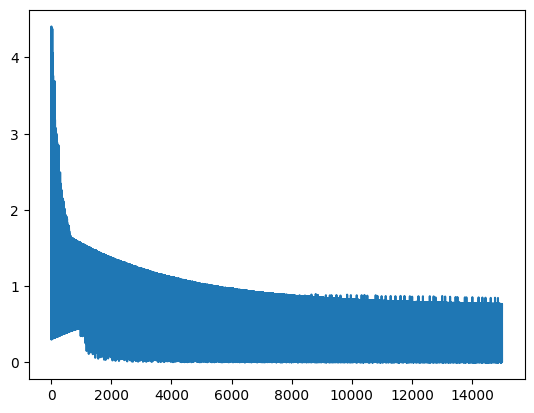

In [61]:
plt.plot(loss_arr)

In [62]:
def softmax_batch(t):
    
    out = np.exp(t)
    return out/np.sum(out, axis = 1, keepdims = True)

In [63]:
def sparse_cross_entropy_batch(z,y):
    
    return - np.log(np.array([z[j, y[j]] for j in range(len(y))]))

In [64]:
def to_full_batch(y, num_classes):
    y_full = np.zeros((len(y), num_classes))
    
    for j, yj in enumerate(y):
        y_full[j,yj] = 1
        
    return y_full

In [65]:
loss_arr = []
arr = []
for ep in range(500):
    
    random.shuffle(dataset)
    for i in range(len(dataset) // batch_size):
        
        batch_x, batch_y = zip(*dataset[i*batch_size: (i+1)*batch_size])
        x = np.concatenate(batch_x, axis = 0)
        y = np.array(batch_y)
        #Forward 

        t1 = np.dot(x, W1) + b1
        h1 = relu(t1)
        t2 = h1 @ W2 + b2
        z = softmax_batch(t2)

        E = np.sum(sparse_cross_entropy_batch(z,y))

        #Backward

        y_full = to_full_batch(y, out_dim)
        
        dE_dt2 = z - y_full 
        dE_dW2 = h1.T @ dE_dt2
        
        dE_db2 = np.sum(dE_dt2, axis = 0, keepdims = True)
        dE_dh1 = dE_dt2 @W2.T
        dE_dt1 = dE_dh1 * relu_deriv(t1)
        dE_dW1 = x.T @ dE_dt1
        dE_db1 = np.sum(dE_dt1, axis = 0, keepdims = True)

        alpha = 0.001

        # update 

        W1 = W1 - alpha * dE_dW1
        b1 = b1 - alpha * dE_db1
        W2 = W2 - alpha * dE_dW2
        b2 = b2 - alpha * dE_db2
        
        loss_arr.append(E)
        acc.append(cals_accuracy(dataset))

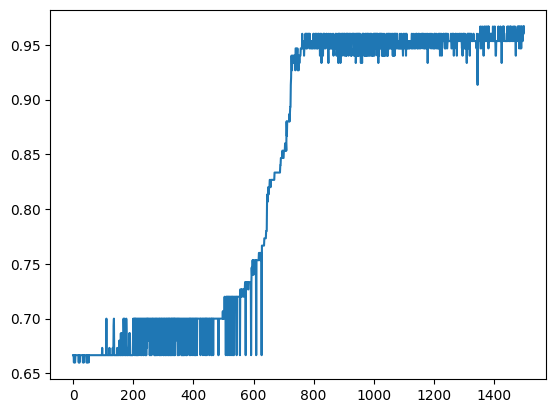

In [66]:
plt.plot(acc)

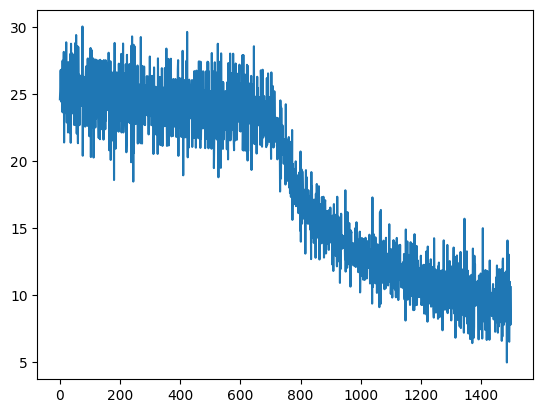

In [67]:
plt.plot(loss_arr)

In [68]:
acc[-1]

0.9666666666666667

In [69]:
curr0 = np.zeros(10, dtype = np.int32)
curr1 = np.zeros(10, dtype = np.int32)
curr2 = np.zeros(10, dtype = np.int32)
curr3 = np.zeros(10, dtype = np.int32)
curr4 = np.zeros(10, dtype = np.int32)
curr5 = np.zeros(10, dtype = np.int32)
curr6 = np.zeros(10, dtype = np.int32)
curr7 = np.zeros(10, dtype = np.int32)
curr8 = np.zeros(10, dtype = np.int32)
curr9 = np.zeros(10, dtype = np.int32)

curr0[0] = 1
curr1[1] = 1
curr2[2] = 1
curr3[3] = 1
curr4[4] = 1
curr5[5] = 1
curr6[6] = 1
curr7[7] = 1
curr8[8] = 1
curr9[9] = 1

In [70]:
digits = {
    0:[zero, curr0],
    1:[one,curr1],
    2:[two,curr2],
    3:[three,curr3],
    4:[four,curr4],
    5:[five,curr5],
    6:[six,curr6],
    7:[sev,curr7],
    8:[eig,curr8],
    9:[nine,curr9]}

In [71]:
np.maximum([1,-2,3], 0)

array([1, 0, 3])

In [72]:
input_dim = 49

h_dim = 10

out_dim = 10

In [73]:
dts = list(digits.values())

In [74]:
input_dim = 49
h_dim = 20
out_dim = 10
W1 = np.random.randn(input_dim, h_dim)
b1 = np.random.randn(1, h_dim)
W2 = np.random.rand(h_dim, out_dim)
b2 = np.random.randn(1, out_dim)

In [75]:
loss_arr = []
arr = []
for ep in range(epoch):
    
    random.shuffle(dts)
    for i in range(len(dts)):

        x,y = dts[i]
        x = x.ravel().reshape(1,-1).copy()
        y = y.reshape(1,-1).copy()
        #Forward 

        t1 = np.dot(x, W1) + b1
        h1 = relu(t1)
        t2 = h1 @ W2 + b2
        z = softmax(t2)

        E = sparse_cross_entropy(z,np.argmax(y))

        #Backward

        y_full = y.copy()
        dE_dt2 = z - y_full 
        dE_dW2 = h1.T @ dE_dt2
        dE_db2 = dE_dt2
        dE_dh1 = dE_dt2 @W2.T
        dE_dt1 = dE_dh1 * relu_deriv(t1)
        dE_dW1 = x.T @ dE_dt1
        dE_db1 = dE_dt1

        alpha = 0.001

        # update 

        W1 = W1 - alpha * dE_dW1
        b1 = b1 - alpha * dE_db1
        W2 = W2 - alpha * dE_dW2
        b2 = b2 - alpha * dE_db2
        
        loss_arr.append(E)
        y = np.argmax(y)
#         acc.append(cals_accuracy(dts))

Predicted value - 0


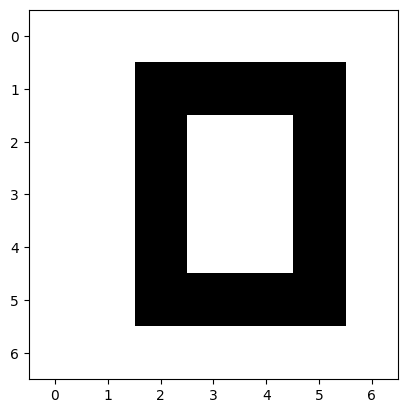

In [76]:
num = 3
plt.imshow(dts[num][0], cmap = 'binary')
print(f'Predicted value - {np.argmax(predict(dts[num][0]))}')

$\text{Gradiens computation: Autograd, Loss computation: PyTorch Loss, Parameter updates: PyTorch Optimizer}$

In [77]:
# 1) Design model (input size, output size, forward pass )
# 2) Construct loss and optimizer
# 3) Training loop

# - forward pass: compute prediction
# - backward pass: gradients
# - update weights


In [78]:
import torch.nn as nn

In [79]:
def forward(x):
    
    return w * x

In [80]:
X = torch.tensor(list(range(1,5)), dtype = torch.float32)
Y = torch.tensor(list(range(1,5)), dtype = torch.float32)*2
w = torch.tensor(0.0, dtype = torch.float32, requires_grad = True)
n_iters = 100
learning_rate = 0.01

loss = nn.MSELoss()
optimizer = torch.optim.SGD([w], lr = learning_rate)

for epoch in range(n_iters):
    
    # prediction = forward pass 
    y_pred = forward(X)
    #loss 
    l = loss(Y,y_pred)
    
    #gradients
    
    l.backward() # dl/dw
    
    #update weights
    optimizer.step()
    
    # zero gradients
    optimizer.zero_grad()
    if epoch%10 == 0:
        print(f'epoch {epoch + 1}: w = {w:.3f}, loss = {l:.8f}')
        
print(f'Prediction before training: f(5) = {forward(5):.3f}')

epoch 1: w = 0.300, loss = 30.00000000
epoch 11: w = 1.665, loss = 1.16278565
epoch 21: w = 1.934, loss = 0.04506890
epoch 31: w = 1.987, loss = 0.00174685
epoch 41: w = 1.997, loss = 0.00006770
epoch 51: w = 1.999, loss = 0.00000262
epoch 61: w = 2.000, loss = 0.00000010
epoch 71: w = 2.000, loss = 0.00000000
epoch 81: w = 2.000, loss = 0.00000000
epoch 91: w = 2.000, loss = 0.00000000
Prediction before training: f(5) = 10.000


In [81]:
X = X.reshape(-1,1)
Y = Y.reshape(-1,1)
n_iters = 1000
learning_rate = 0.01

n_samples, n_feature = X.shape

input_size = n_feature
output_size = n_feature

X_test = torch.tensor([5], dtype = torch.float32)

model = nn.Linear(input_size, output_size)
print(f'Prediction before training: f(5) = {model(X_test).item():.3f}')

loss = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

Prediction before training: f(5) = 1.328


In [82]:
for epoch in range(n_iters):
    
    # prediction = forward pass 
    y_pred = model(X)
    #loss 
    l = loss(Y,y_pred)
    
    #gradients
    
    l.backward() # dl/dw
    
    #update weights
    optimizer.step()
    
    # zero gradients
    optimizer.zero_grad()
    if epoch%100 == 0:
        [w,b] = model.parameters()
        print(f'epoch {epoch}: w = {w[0][0].item():.3f}, loss = {l:.8f}')
        
print(f'Prediction before training: f(5) = {model(X_test).item():.3f}')

epoch 0: w = 0.690, loss = 25.31702995
epoch 100: w = 2.047, loss = 0.00317008
epoch 200: w = 2.035, loss = 0.00174035
epoch 300: w = 2.026, loss = 0.00095543
epoch 400: w = 2.019, loss = 0.00052453
epoch 500: w = 2.014, loss = 0.00028796
epoch 600: w = 2.010, loss = 0.00015809
epoch 700: w = 2.008, loss = 0.00008679
epoch 800: w = 2.006, loss = 0.00004764
epoch 900: w = 2.004, loss = 0.00002616
Prediction before training: f(5) = 10.006


$\text{Let's write our own model}$

In [83]:
class LinearRegression(nn.Module):
    
    def __init__(self, input_dim, out_dim):
        super().__init__()
        #define layers
        
        self.lin = nn.Linear(input_dim, out_dim)
        
    def forward(self, x):
        
        return self.lin(x)


In [84]:
X = X.reshape(-1,1)
Y = Y.reshape(-1,1)
n_iters = 1000
learning_rate = 0.01

n_samples, n_feature = X.shape

input_size = n_feature
output_size = n_feature

X_test = torch.tensor([5], dtype = torch.float32)

# model = nn.Linear(input_size, output_size)
model = LinearRegression(input_size, output_size)
print(f'Prediction before training: f(5) = {model(X_test).item():.3f}')

loss = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

Prediction before training: f(5) = 4.258


In [85]:
for epoch in range(n_iters):
    
    # prediction = forward pass 
    y_pred = model(X)
    #loss 
    l = loss(Y,y_pred)
    
    #gradients
    
    l.backward() # dl/dw
    
    #update weights
    optimizer.step()
    
    # zero gradients
    optimizer.zero_grad()
    if epoch%100 == 0:
        [w,b] = model.parameters()
        print(f'epoch {epoch}: w = {w[0][0].item():.3f}, loss = {l:.8f}')
        
print(f'Prediction before training: f(5) = {model(X_test).item():.3f}')

epoch 0: w = 0.937, loss = 9.02942467
epoch 100: w = 1.817, loss = 0.04879402
epoch 200: w = 1.864, loss = 0.02678736
epoch 300: w = 1.899, loss = 0.01470593
epoch 400: w = 1.925, loss = 0.00807338
epoch 500: w = 1.945, loss = 0.00443220
epoch 600: w = 1.959, loss = 0.00243322
epoch 700: w = 1.970, loss = 0.00133581
epoch 800: w = 1.978, loss = 0.00073334
epoch 900: w = 1.983, loss = 0.00040259
Prediction before training: f(5) = 9.975


In [86]:
from sklearn import datasets

In [87]:
#0) prepare data

X_numpy, y_numpy = datasets.make_regression(n_samples = 100, n_features=1, noise=20, random_state=1)

X = torch.from_numpy(X_numpy.astype(np.float32))
y = torch.from_numpy(y_numpy.astype(np.float32))

y = y.view(y.shape[0], 1) #reshape tensor

n_samples, n_features = X.shape

In [88]:
#1) Model

input_size = n_features
output_size = 1 # We want to have one value for each sample that we want to put in
model = nn.Linear(input_size, output_size)

In [89]:
#2)Loss and optimizer
learning_rate = 0.01
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

epoch: 10, loss = 4382.2227
epoch: 20, loss = 3268.6729
epoch: 30, loss = 2463.2703
epoch: 40, loss = 1880.1040
epoch: 50, loss = 1457.4237
epoch: 60, loss = 1150.7762
epoch: 70, loss = 928.1160
epoch: 80, loss = 766.3101
epoch: 90, loss = 648.6403
epoch: 100, loss = 563.0096


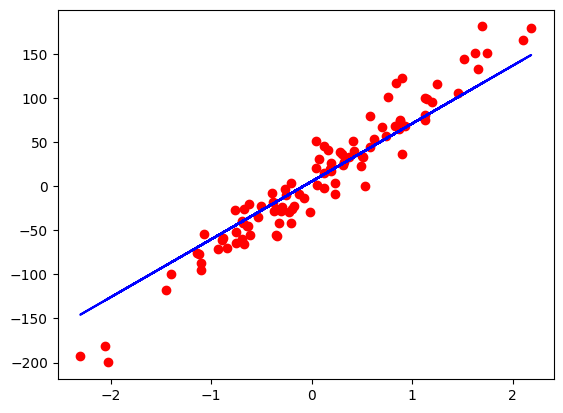

In [90]:
#3) training loop

n_epochs = 100

for ep in range(n_epochs):
    
    #forward pass and loss
    y_pred = model(X)
    loss = criterion(y_pred, y)
    #backward 
    
    loss.backward()
    
    #update
    
    optimizer.step() #update the weights
    
    optimizer.zero_grad()
    
    if (ep+1) % 10 == 0:
        
        print(f'epoch: {ep+1}, loss = {loss.item():.4f}')

predicted = model(X).detach().numpy()  # detach() generate new tensor where our attribute required_grad is false
plt.plot(X_numpy, y_numpy, 'ro')
plt.plot(X_numpy, predicted, 'b')
plt.show()

In [91]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [92]:
#0) prepare data

bc = datasets.load_breast_cancer()
X,y = bc.data, bc.target

n_samples, n_features = X.shape
print(n_samples, n_features)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 1234)

# scale 
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

X_train = torch.from_numpy(X_train.astype(np.float32))
X_test = torch.from_numpy(X_test.astype(np.float32))
y_train = torch.from_numpy(y_train.astype(np.float32))
y_test = torch.from_numpy(y_test.astype(np.float32))

y_train = y_train.view(y_train.shape[0], 1)
y_test = y_test.view(y_test.shape[0], 1)



569 30


In [93]:
#1) Model
# f = wx+b, sigmoid at the end

class LogisticRegression(nn.Module):
    
    def __init__(self, n_input_features):
        super().__init__()
        
        self.linear = nn.Linear(n_input_features, 1)
        
        
    def forward(self, x):
        
        y_predicted = torch.sigmoid(self.linear(x))
        
        return y_predicted
    
model = LogisticRegression(n_features)

In [94]:
#2) loss and optimizer 

criterion = nn.BCELoss()
learning_rate = 0.01
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

In [95]:
#3) training loop

num_epochs = 1000

for epoch in range(num_epochs):
    #forward pass and loss 
    
    y_predicted = model(X_train)
    loss = criterion(y_predicted, y_train)
    
    # backward pass 
    
    loss.backward()
    
    # updates
    optimizer.step()
    
    # zero gradients
    optimizer.zero_grad()
    
    if (epoch+1)  % 100 ==0:
        
        print(f'epoch: {epoch+1}, loss = {loss.item():.4f}')

with torch.no_grad():
    y_predicted = model(X_test)
    y_predicted_cls = y_predicted.round()
    acc = y_predicted_cls.eq(y_test).sum() / float(y_test.shape[0])
    print(f'accuracy = {acc:.4f}')


epoch: 100, loss = 0.2435
epoch: 200, loss = 0.1786
epoch: 300, loss = 0.1486
epoch: 400, loss = 0.1309
epoch: 500, loss = 0.1189
epoch: 600, loss = 0.1102
epoch: 700, loss = 0.1035
epoch: 800, loss = 0.0981
epoch: 900, loss = 0.0936
epoch: 1000, loss = 0.0899
accuracy = 0.9298


$\Large\text{Dataset and DataLoader - Batch Training}$

In [96]:
import torch
import torchvision
from torch.utils.data import Dataset, DataLoader
import math

In [97]:
#implementation of our own dataset
class WineDataset(Dataset):
    
    def __init__(self):
        
        #data loading
        xy = np.loadtxt('wine.csv', delimiter=',', dtype = np.float32, skiprows=1)
        self.x = torch.from_numpy(xy[:,1:])
        self.y = torch.from_numpy(xy[:,[0]]) #n_samples = 1
        self.n_samples = xy.shape[0]
        
        
    def __getitem__(self,index):
        # dataset[0]
        return self.x[index], self.y[index]
        
    def __len__(self):  # is used to len(dataset)
        return self.n_samples
        #len(dataset)

In [98]:
batch_size = 4
dataset = WineDataset()
dataloader = DataLoader(dataset=dataset, batch_size=batch_size, shuffle = True) # num_workers=2 we can add 
# first_data = dataset[0]
# features, labels = first_data
# features, labels

In [99]:
# dataloader = DataLoader(dataset=dataset, batch_size=4, shuffle = True) # num_workers=2 we can add 
# dataiter = iter(dataloader)
# data = next(dataiter)
# features, labels = data
# features, labels

In [100]:
#training loop

num_epochs = 2
total_samples = len(dataset)
n_iterations = math.ceil(total_samples / batch_size)
print(total_samples,n_iterations)

178 45


In [101]:
for epoch in range(num_epochs):
    for i, (inputs, labels) in enumerate(dataloader):
        # forward backward update
        
        if (i+1) % 5 == 0:
            print(f'epoch {epoch+1}/{num_epochs}, step {i+1}/{n_iterations}, inputs {inputs.shape}')

epoch 1/2, step 5/45, inputs torch.Size([4, 13])
epoch 1/2, step 10/45, inputs torch.Size([4, 13])
epoch 1/2, step 15/45, inputs torch.Size([4, 13])
epoch 1/2, step 20/45, inputs torch.Size([4, 13])
epoch 1/2, step 25/45, inputs torch.Size([4, 13])
epoch 1/2, step 30/45, inputs torch.Size([4, 13])
epoch 1/2, step 35/45, inputs torch.Size([4, 13])
epoch 1/2, step 40/45, inputs torch.Size([4, 13])
epoch 1/2, step 45/45, inputs torch.Size([2, 13])
epoch 2/2, step 5/45, inputs torch.Size([4, 13])
epoch 2/2, step 10/45, inputs torch.Size([4, 13])
epoch 2/2, step 15/45, inputs torch.Size([4, 13])
epoch 2/2, step 20/45, inputs torch.Size([4, 13])
epoch 2/2, step 25/45, inputs torch.Size([4, 13])
epoch 2/2, step 30/45, inputs torch.Size([4, 13])
epoch 2/2, step 35/45, inputs torch.Size([4, 13])
epoch 2/2, step 40/45, inputs torch.Size([4, 13])
epoch 2/2, step 45/45, inputs torch.Size([2, 13])


In [102]:
# torchvision.datasets.MNIST() built-in datasets
#fashion-mnist , cifar, coco

$\Large\text{Dataset Transforms}$

In [103]:
#implementation of our own dataset
class WineDataset(Dataset):
    
    def __init__(self, transform = None):
        
        #data loading
        xy = np.loadtxt('wine.csv', delimiter=',', dtype = np.float32, skiprows=1)
#         self.x = torch.from_numpy(xy[:,1:])
#         self.y = torch.from_numpy(xy[:,[0]]) #n_samples = 1
        
        self.x = xy[:,1:]
        self.y = xy[:,[0]]
    
        self.n_samples = xy.shape[0]
        
        self.transform = transform
        
    def __getitem__(self,index):
        # dataset[0]
        sample = self.x[index], self.y[index]
        if self.transform:
            sample = self.transform(sample)
            
        return sample
        
    def __len__(self):  # is used to len(dataset)
        return self.n_samples
        #len(dataset)
    

In [104]:
class ToTensor:
    def __call__(self, sample):
        inputs, targets = sample
        
        return torch.from_numpy(inputs), torch.from_numpy(targets)

In [105]:
class MulTransform:
    
    def __init__(self,factor):
        self.factor = factor
        
    def __call__(self, sample):
        
        inputs, target = sample
        
        inputs *= self.factor
        
        return inputs, target

In [106]:
dataset = WineDataset(transform=ToTensor())
first_data = dataset[0]
features, labels = first_data
type(features)

torch.Tensor

In [107]:
# Compose transform

composed = torchvision.transforms.Compose([ToTensor(), MulTransform(2)])
dataset = WineDataset(transform = composed)
first_data = dataset[0]
features, labels = first_data
features, labels

(tensor([2.8460e+01, 3.4200e+00, 4.8600e+00, 3.1200e+01, 2.5400e+02, 5.6000e+00,
         6.1200e+00, 5.6000e-01, 4.5800e+00, 1.1280e+01, 2.0800e+00, 7.8400e+00,
         2.1300e+03]),
 tensor([1.]))

In [108]:
# torch softmax 

x = torch.tensor([2.0, 1.0, 0.1])
outputs = torch.softmax(x, dim = 0)
print(outputs)

tensor([0.6590, 0.2424, 0.0986])


In [109]:
m = nn.Softmax(dim=1)
input = torch.randn(2, 3)
output = m(input)

In [110]:
input, output, output.sum(axis = 1)

(tensor([[ 0.4075, -1.3716, -0.1496],
         [-1.4718, -0.3437, -0.6587]]),
 tensor([[0.5742, 0.0969, 0.3289],
         [0.1576, 0.4870, 0.3554]]),
 tensor([1.0000, 1.0000]))

In [111]:
m = nn.Softmax(dim=0)
input = torch.randn(2, 3)
output = m(input)

In [112]:
input, output, output.sum(axis = 0)

(tensor([[-0.1357,  0.1205,  0.8003],
         [ 1.4219,  1.0773, -1.4517]]),
 tensor([[0.1740, 0.2775, 0.9048],
         [0.8260, 0.7225, 0.0952]]),
 tensor([1.0000, 1.0000, 1.0000]))

In [113]:
def cross_entropy(actual, predicted):
    loss = - np.sum(actual * np.log(predicted))
    return loss # ideally normalize it like / float(predicted.shape[0])

# y must be one hot encoded 
# if class 0: [1, 0, 0]
# if class 1: [0, 1, 0]
# if class 2: [0, 0, 1]

In [114]:
loss = nn.CrossEntropyLoss()
Y = torch.tensor([0]) # No hot encoded
# size: n_samples * n_classes = 1 * 3
Y_pred_good = torch.tensor([[2.0, 1.0, 0.1]]) #raw values
Y_pred_bad = torch.tensor([[0.5, 2.0, 0.3]]) #raw values

l1 = loss(Y_pred_good, Y)
l2 = loss(Y_pred_bad, Y)
print(l1.item(), l2.item())


_, predictions1 = torch.max(Y_pred_good,1)
_, predictions2 = torch.max(Y_pred_bad,1)
print(predictions1,predictions2)

0.4170299470424652 1.840616226196289
tensor([0]) tensor([1])


In [115]:
loss = nn.CrossEntropyLoss()
# 3 samples
Y = torch.tensor([2,0,1]) # No hot encoded  right classes
# size: n_samples * n_classes = 3 * 3
Y_pred_good = torch.tensor([[0.1, 1.0, 2.1], [2.0, 1.0, 0.1],[0.0, 3.0, 0.1]]) #raw values
Y_pred_bad = torch.tensor([[2.1, 1.0, 0.1], [0.1, 1.0, 2.1],[0.0, 3.0, 0.1]]) #raw values

l1 = loss(Y_pred_good, Y)
l2 = loss(Y_pred_bad, Y)
print(l1.item(), l2.item())


_, predictions1 = torch.max(Y_pred_good,1)
_, predictions2 = torch.max(Y_pred_bad,1)
print(predictions1,predictions2)

0.3002483546733856 1.6225852966308594
tensor([2, 0, 1]) tensor([0, 2, 1])


In [116]:
class NeuralNet2(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super().__init__()
        self.linear1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.linear2 = nn.Linear(hidden_size, num_classes)
        
    def forward(self, x):
        out = self.linear1(x)
        out = self.relu(out)
        out = self.linear2(out)
        # we can use y_pred = torch.sigmoid(out), if num_classes = 1
        # and use nn.BCELoss()
        return out
        
        

In [117]:
model = NeuralNet2(input_size = 28*28, hidden_size = 5, num_classes=3)
criterion = nn.CrossEntropyLoss() # applies Softmax

$\text{If we use nn.BCELoss(), we use sigmoid at the end}$

In [118]:
import torch.nn.functional as F

In [119]:
#1 option we can create dunctions from the nn modules
class NeuralNet2(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super().__init__()
        self.linear1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.linear2 = nn.Linear(hidden_size, num_classes)
        self.sigmoid = nn.Sigmoid()
        
    def forward(self, x):
        out = self.linear1(x)
        out = self.relu(out)
        out = self.linear2(out)
        out = self.sigmoid(out)
        
        return out
        

#2 option (use activation functions directoly in forward pass)
class NeuralNet2(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super().__init__()
        self.linear1 = nn.Linear(input_size, hidden_size)
        self.linear2 = nn.Linear(hidden_size, num_classes)
        
    def forward(self, x):
        out = torch.relu(self.linear1(x))
        # it will be the same as F.relu() but F.leaky_relu only available in F 
        out = torch.sigmoid(self.linear2(out))
        
        return out

In [120]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms

In [121]:
# device config

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [122]:
# hyper parameters

input_size = 784 # 28*28
hidden_size = 100
num_classes = 10
num_epochs = 2

batch_size = 100
learning_rate = 0.001

In [124]:
#MNIST
# train_dataset = torchvision.datasets.MNIST(root = '../dl/', train = True,
#     transform = transforms.ToTensor())

# test_dataset = torchvision.datasets.MNIST(root = '../dl/', train = False,
#     transform = transforms.ToTensor())

train_dataset = torchvision.datasets.MNIST(root = '../dl/', train = True, download = True,
    transform = transforms.ToTensor())

test_dataset = torchvision.datasets.MNIST(root = '../dl/', train = False,
    transform = transforms.ToTensor())

100%|██████████| 9912422/9912422 [00:01<00:00, 5027172.41it/s]


Extracting ../dl/MNIST\raw\train-images-idx3-ubyte.gz to ../dl/MNIST\raw



100%|██████████| 28881/28881 [00:00<00:00, 14450160.30it/s]


Extracting ../dl/MNIST\raw\train-labels-idx1-ubyte.gz to ../dl/MNIST\raw



100%|██████████| 1648877/1648877 [00:00<00:00, 4314916.08it/s]


Extracting ../dl/MNIST\raw\t10k-images-idx3-ubyte.gz to ../dl/MNIST\raw



100%|██████████| 4542/4542 [00:00<00:00, 4538001.14it/s]

Extracting ../dl/MNIST\raw\t10k-labels-idx1-ubyte.gz to ../dl/MNIST\raw



In [125]:
train_loader = torch.utils.data.DataLoader(dataset = train_dataset, batch_size = batch_size, shuffle = True)
test_loader = torch.utils.data.DataLoader(dataset = test_dataset, batch_size = batch_size, shuffle = False)

In [126]:
examples = iter(train_loader)
samples, labels = next(examples)

In [127]:
samples.shape, labels.shape

(torch.Size([100, 1, 28, 28]), torch.Size([100]))

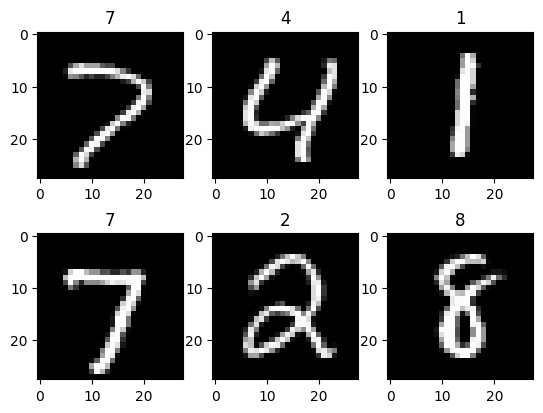

In [128]:
for i in range(6):
    plt.subplot(2,3, i+1)
    plt.imshow(samples[i][0].numpy(), cmap = 'gray')
    plt.title(labels[i].item())
plt.show()

In [129]:
class NeuralNet(nn.Module):
    
    def __init__(self, input_size, hidden_size, num_classes):
        super().__init__()
        self.l1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.l2 = nn.Linear(hidden_size, num_classes)
        
    def forward(self, x):
        
        out = self.l1(x)
        out = self.relu(out)
        out = self.l2(out)
        
        return out
        

In [130]:
model = NeuralNet(input_size, hidden_size, num_classes)
#loss and optimizer 
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)



In [131]:
#training loop

n_total_steps = len(train_loader)

for epoch in range(num_epochs):
    
    for i, (images, labels) in enumerate(train_loader):
        
        # 100, 1, 28, 28
        # to 100, 784
        
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        
        # forward 
        
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        
        # backward
        
        optimizer.zero_grad()
        loss.backward()
        
        optimizer.step()
        
        if (i+1) % 100 ==0:
            
            print(f'epoch {epoch+1} / {num_epochs}, step {i+1}/{n_total_steps}, loss = {loss.item():.4f}')
            

# test

with torch.no_grad():
    n_correct = 0
    n_samples = 0
    for images, labels in test_loader:
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        outputs = model(images)
        # value, index(class label)
        _, predictions = torch.max(outputs,1)
        n_samples += labels.shape[0]
        n_correct += (predictions == labels).sum().item()
        
    acc = 100.0* n_correct/n_samples
    
    print(f'accuracy = {acc}')
        
        
        

epoch 1 / 2, step 100/600, loss = 0.3986
epoch 1 / 2, step 200/600, loss = 0.3626
epoch 1 / 2, step 300/600, loss = 0.1636
epoch 1 / 2, step 400/600, loss = 0.3853
epoch 1 / 2, step 500/600, loss = 0.2826
epoch 1 / 2, step 600/600, loss = 0.3296
epoch 2 / 2, step 100/600, loss = 0.1736
epoch 2 / 2, step 200/600, loss = 0.1410
epoch 2 / 2, step 300/600, loss = 0.2495
epoch 2 / 2, step 400/600, loss = 0.1398
epoch 2 / 2, step 500/600, loss = 0.1228
epoch 2 / 2, step 600/600, loss = 0.1516
accuracy = 94.92


In [132]:
torch.max(torch.tensor([[1,2,3],[1,2,5]]), 1)

torch.return_types.max(
values=tensor([3, 5]),
indices=tensor([2, 2]))

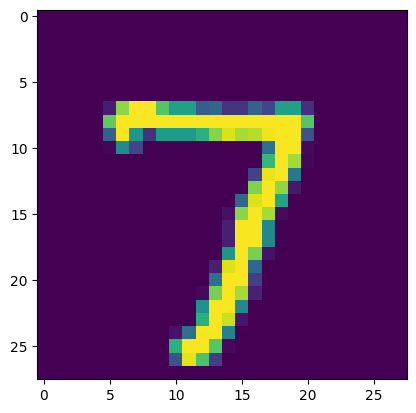

In [133]:
plt.imshow(samples[3][0])
plt.show()

In [134]:
with torch.no_grad():
    _, cur = torch.max(model(samples[3].reshape(-1, 28*28)), 1)

In [135]:
cur

tensor([7])

In [3]:
input_size = 784 # 28*28
hidden_size = 100
num_classes = 10
num_epochs = 4

batch_size = 4
learning_rate = 0.001

In [4]:
# dataset has PILImage images of range [0,1]
# Transform them to Tensors of normalized range [-1,1]
transform = transforms.Compose(
    [
        transforms.ToTensor(),
        transforms.Normalize((0.5,0.5,0.5), (0.5,0.5,0.5))
    ]
)

In [5]:
#CIFAR - 10
train_dataset = torchvision.datasets.CIFAR10(root = '../dl/', train = True,
    transform = transform)

test_dataset = torchvision.datasets.CIFAR10(root = '../dl/', train = False,
    transform = transform)

In [6]:
train_loader = torch.utils.data.DataLoader(dataset = train_dataset, batch_size = batch_size, shuffle = True)
test_loader = torch.utils.data.DataLoader(dataset = test_dataset, batch_size = batch_size, shuffle = False)

In [7]:
trainiter = iter(train_loader)
example = next(trainiter)

In [8]:
images, labels = example

In [9]:
len(train_loader)

12500

In [10]:
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse',
          'ship', 'truck')

In [11]:
images_num = images.numpy()

In [12]:
np.transpose(images_num[0]).shape

(32, 32, 3)

In [13]:
a = np.arange(24).reshape(2,3,4)

In [14]:
np.transpose(a, (2,0,1)).shape

(4, 2, 3)

In [15]:
def imshow(img):
    img = img/2 +0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg,(1,2,0)))

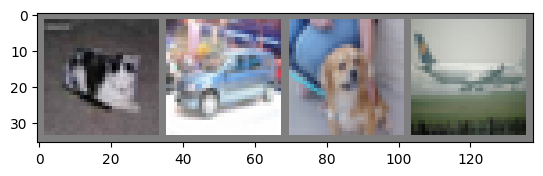

In [16]:
imshow(torchvision.utils.make_grid(images))

In [54]:
conv1 = nn.Conv2d(3,6,5)
pool = nn.MaxPool2d(2,2)
conv2 = nn.Conv2d(6,16,5)
print(images.shape)

x = conv1(images)
print(f'conv1 - {x.shape}')
x = pool(x)
print(f'pool - {x.shape}')
x = conv2(x)
print(f'conv2 - {x.shape}')
x = pool(x)
print(f'pool - {x.shape}')

torch.Size([4, 3, 32, 32])
conv1 - torch.Size([4, 6, 28, 28])
pool - torch.Size([4, 6, 14, 14])
conv2 - torch.Size([4, 16, 10, 10])
pool - torch.Size([4, 16, 5, 5])


In [55]:
class ConvNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6,5) # 3 RGB, 6 - output layer, 5 - kernel size
        self.pool = nn.MaxPool2d(2,2)
        self.conv2 = nn.Conv2d(6,16,5)
        self.fc1 = nn.Linear(16*5*5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
    
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x))) #first convolutional and pooling layer
        x = self.pool(F.relu(self.conv2(x))) #second convolutional and pooling layer
        x = x.view(-1, 16*5*5) #flatten the tensor
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        
        return x
        

In [56]:
model = ConvNet()
#loss and optimizer 
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')



In [57]:
#training loop

n_total_steps = len(train_loader)

for epoch in range(num_epochs):
    
    for i, (images, labels) in enumerate(train_loader):
        
        # origin shape: [4,3,32,32] = 4,3, 1024
        # input_layer: 3 input layers, 6 output channels, 5 kernel size
        
        images = images.to(device)
        labels = labels.to(device)
        
        # forward 
        
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        
        # backward
        
        optimizer.zero_grad()
        loss.backward()
        
        optimizer.step()
        
        if (i+1) % 2000 ==0:
            
            print(f'epoch {epoch+1} / {num_epochs}, step {i+1}/{n_total_steps}, loss = {loss.item():.4f}')
            

# test

with torch.no_grad():
    n_correct = 0
    n_samples = 0
    n_class_correct = [0 for i in range(10)]
    n_class_samples = [0 for i in range(10)]
    
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        # max returns (value, index)
        # value, index(class label)
        _, predictions = torch.max(outputs,1)
        n_samples += labels.size(0)
        n_correct += (predictions == labels).sum().item()
        
        for i in range(batch_size):
            label = labels[i]
            pred = predictions[i]
            if (label == pred):
                n_class_correct[label] +=1
            n_class_samples[label] +=1
                
        
    acc = 100.0* n_correct/n_samples
    
    print(f'accuracy = {acc}')
    
    for i in range(10):
        acc = 100.0 * n_class_correct[i] / n_class_samples[i]
        print(f'Accuracy of {classes[i]}: {acc} %')
        
        
        

epoch 1 / 4, step 2000/12500, loss = 2.2964
epoch 1 / 4, step 4000/12500, loss = 2.2845
epoch 1 / 4, step 6000/12500, loss = 2.2857
epoch 1 / 4, step 8000/12500, loss = 2.2722
epoch 1 / 4, step 10000/12500, loss = 2.2502
epoch 1 / 4, step 12000/12500, loss = 1.7170
epoch 2 / 4, step 2000/12500, loss = 1.9966
epoch 2 / 4, step 4000/12500, loss = 2.5348
epoch 2 / 4, step 6000/12500, loss = 1.7913
epoch 2 / 4, step 8000/12500, loss = 1.1439
epoch 2 / 4, step 10000/12500, loss = 1.9280
epoch 2 / 4, step 12000/12500, loss = 1.9335
epoch 3 / 4, step 2000/12500, loss = 1.4773
epoch 3 / 4, step 4000/12500, loss = 1.6420
epoch 3 / 4, step 6000/12500, loss = 1.8505
epoch 3 / 4, step 8000/12500, loss = 1.9230
epoch 3 / 4, step 10000/12500, loss = 1.5681
epoch 3 / 4, step 12000/12500, loss = 1.6036
epoch 4 / 4, step 2000/12500, loss = 1.5547
epoch 4 / 4, step 4000/12500, loss = 1.4884
epoch 4 / 4, step 6000/12500, loss = 1.0084
epoch 4 / 4, step 8000/12500, loss = 1.1779
epoch 4 / 4, step 10000/12

In [59]:
model.state_dict()

OrderedDict([('conv1.weight',
              tensor([[[[-1.7922e-01, -1.4424e-01, -9.9908e-02, -1.4031e-01, -1.6743e-02],
                        [-1.5529e-02, -3.6553e-02, -6.1301e-02,  4.8635e-02,  3.3125e-02],
                        [-1.0336e-01,  1.7008e-02,  8.3599e-02, -1.2109e-01, -6.8817e-02],
                        [-3.4949e-02,  2.4649e-02, -5.9641e-02,  7.4061e-02,  8.8998e-02],
                        [ 9.9973e-03, -7.9802e-02, -9.3214e-02,  2.0020e-02, -6.4523e-02]],
              
                       [[ 8.3413e-03,  2.4392e-02,  2.5649e-02, -9.2403e-02, -1.1881e-01],
                        [ 3.8466e-02, -1.1540e-01,  7.2564e-02,  2.0532e-02,  6.9062e-02],
                        [ 4.2303e-02, -5.5134e-02, -9.2347e-02,  1.1848e-01,  9.7283e-02],
                        [-1.3999e-03,  1.3164e-01,  5.2748e-02,  3.4898e-02, -7.3415e-02],
                        [ 1.0565e-02, -3.8307e-02,  9.8015e-02,  9.1243e-02, -3.9102e-02]],
              
                       [[ 1.

$\Large\text{Transfer learning}$

In [24]:
from torch.optim import lr_scheduler
from torchvision import datasets, models, transforms
import os
import copy

In [20]:
mean = np.array([0.485, 0.456, 0.406])
std = np.array([0.229, 0.224, 0.225])

In [29]:
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize(mean, std)
    ]),
    'val': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(mean,std)
    ])
}

In [30]:
data_dir = './hymenoptera_data'
sets = ['train', 'val']

In [32]:
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir,x),
                                        data_transform) for x in sets}

In [33]:
dataloaders = {
    x: torch.utils.data.DataLoader(image_datasets[x], batch_size = 4,
                                  shuffle = True, num_workers = 0)
    for x in sets
}

In [34]:
dataset_sizes = {
    x: len(image_datasets[x]) for x in sets
}

In [40]:
class_names = image_datasets['train'].classes

In [41]:
class_names

['ants', 'bees']

In [51]:
def imshow(inp, title):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    plt.title(title)
    plt.show()


In [52]:
dataloaders['train']

In [48]:
datatrainiter = iter(dataloaders['train'])

In [50]:
datatrainiter

In [53]:
def train_model(model, criterion, optimizer, scheduler, num_epochs=25):
    since = time.time()

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch, num_epochs - 1))
        print('-' * 10)

        # Each epoch has a training and validation phase
        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0

            # Iterate over data.
            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)

                # forward
                # track history if only in train
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    # backward + optimize only if in training phase
                    if phase == 'train':
                        optimizer.zero_grad()
                        loss.backward()
                        optimizer.step()

                # statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            if phase == 'train':
                scheduler.step()

            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]

            print('{} Loss: {:.4f} Acc: {:.4f}'.format(
                phase, epoch_loss, epoch_acc))

            # deep copy the model
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())

        print()

    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(
        time_elapsed // 60, time_elapsed % 60))
    print('Best val Acc: {:4f}'.format(best_acc))

    # load best model weights
    model.load_state_dict(best_model_wts)
    return model